# Прогноз и планирование продаж 2017 года

## Описание проекта

В распоряжении имеются данные по продажам видеоигр магазина "Стримчик". Продажи ведутся по всему миру. Необходимо выявить факторы и закономерности, определяющие успешность игры, что поможет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании 

### Цели исследования 

Необходимо провести исследовательский анализ данных:
1. Измерить количество выпускаемых игр по годам
2. Измерить то, как менялись продажи по платформам и выбрать платформы с наибольшими суммарными продажами. Выяснить, за какой срок появляются и исчезают старые платформы
3. Определить актуальный период из всех данных для планирования и прогнозирования продаж на 2017 год
4. Выяснить, какие платформы лидируют по продажам, определить тенденции к росту и падению продаж на этих платформах. Выбрать несколько потенциально прибыльных платформ.
5. Построить диаграммы размаха по глобальным продажам игр в разбивке по платформам
6. Оценить влияние отзывов и критиков на продажи. Построить диаграммы рессеяния.
7. Соотнести выводы с продажами игр на других платформах
8. Выявить самые прибыльные жанры. Выделить жанры с самыми высокими и низкими продажами.

Необходимо составить портрет пользователя каждого региона (NA, EU, JP):
1. Описать различие в долях продаж по пяти популярным платформам
2. Выявить топ-5 популярных жанров
3. Описать влияние рейтинга ESRB на продажи в отдельном регионе

Необходимо проверить гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров *Action* и *Sports* разные

## 1. Открываем данные

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

In [2]:
sns.set_style("darkgrid")

In [3]:
data = pd.read_csv('datasets/games.csv')

In [4]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Из таблиц выше выявили следующие проблемы: 
1. Названия столбцов необходимо привести к "змеиному стилю"
2. Отсутствующие значения. Посмотрим на них и поправим
3. Необходимо привести данные к нужному типу

## 2.Преподготовка данных

### 2.1 Замена названий столбцов

In [7]:
data.columns = ['game_name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

### 2.2 Работа с дубликатами

In [8]:
data.duplicated().sum()

0

Полных дубликатов нет. Проверим по играм

In [9]:
data[data['game_name'].duplicated()].sort_values('game_name')

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
...,...,...,...,...,...,...,...,...,...,...,...
3304,pro evolution soccer 2011,X360,2010.0,Sports,0.09,0.44,0.00,0.07,79.0,5.9,E
4664,pro evolution soccer 2011,PS2,2010.0,Sports,0.04,0.21,0.05,0.11,NaN,6.7,E
2583,pro evolution soccer 2011,PSP,2010.0,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E


Тут наличие дубликатов объясняется выходом игры на разных платформах. Позже проверим по каждой

Посмотрим как записаны платормы

In [10]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Тут все хорошо. Теперь проверим нет ли дубликата выхода игры на одной и той же платформе

In [11]:
data[data[['game_name','platform']].duplicated(keep = False)].sort_values('game_name')

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


индексы 16230 и 4127 без сомнений являются дубликатами, сложим значения в колонке продаж и удалим эти строки.
индексы 1591 и 11715 не являются дубликатами, т.к. эти игры действительно разные
с NaN пока ничего делать не будем

In [12]:
data.loc[604, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] += data.loc[16230, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
data.loc[1745, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] += data.loc[4127, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
data.drop([16230, 4127], inplace = True)

In [13]:
data.reset_index(drop = True, inplace = True)

теперь все хорошо. проверим неявные дубликаты по жанрам

In [14]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

Все ок. Неявных дубликатов в датафрейме нет

### 2.3 Работа с пропусками

Посмотрим еще раз на пропуски

In [15]:
pd.concat([data.isna().sum(), data.isna().mean() * 100], axis = 1)\
.rename(columns = {0:'nan_sum',1:'nan_percent'})\
.style.background_gradient('coolwarm')

,nan_sum,nan_percent
game_name,2,0.011967
platform,0,0.000000
year_of_release,268,1.603542
genre,2,0.011967
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8578,51.325316
user_score,6701,40.094537


Довольно много пропущенных значений в рейтинге и оценках. Посмотрим отдельно на каждое значение

#### 2.3.1 Убираем пропуски в `game_name`, `genre`

In [16]:
data[data['game_name'].isna()]

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14243,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


1993 год, один из лидеров продаж. Вряд ли игры с датой выхода 1993 приносят много выручки и являются критичными для планирования стратегии продаж. Смело ставим заглушку

Замечаем, что 2 пропуска из жанра по таблице выше находятся под теми же самыми индексами. Ставим ту же заглушку туда.

In [17]:
data[['game_name','genre']] = data[['game_name', 'genre']].fillna('Unknown')

In [18]:
data[data['game_name'] == 'Unknown']

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknown,GEN,1993.0,Unknown,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14243,Unknown,GEN,1993.0,Unknown,0.00,0.00,0.03,0.00,NaN,NaN,NaN


#### 2.3.2 Убираем пропуски в `year_of_release`

Заполнить пропуски достоверно не сможем. Минимальное значение 1980 год, максимальное - 2016. Поставим значение 1970, которое не будет мешать визуализации

In [19]:
data['year_of_release'] = data['year_of_release'].fillna(1970)

#### 2.3.3 Убираем пропуски в `critic_score`,`user_score`

Многие игры выпускаются на разных платформах, но имеют на каждой из них свои рейтинги, которые могут кардинально отличаться. Ставим заглушку. 

Но, чтобы не полагаться на мнение, все равно проверим как эти оценки коррелируют между собой. Для этого приведем данные из столбцов `user_score`,`rating` в нужный тип

In [20]:
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,1.000000,-0.068406,0.011847,-0.118790,0.036135,0.016474
na_sales,-0.068406,1.000000,0.765358,0.449589,0.638646,0.240784
eu_sales,0.011847,0.765358,1.000000,0.435060,0.722987,0.220779
jp_sales,-0.118790,0.449589,0.435060,1.000000,0.291083,0.152614
other_sales,0.036135,0.638646,0.722987,0.291083,1.000000,0.198580
critic_score,0.016474,0.240784,0.220779,0.152614,0.198580,1.000000


In [21]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение `tbd` обозначает, что игра имет мало отзывов и ее рейтинг не определен. Заменим пока что на NaN

In [22]:
data.loc[data['user_score'] == 'tbd','user_score'] = float('nan')
data['user_score'] = data['user_score'].astype('float')

Проверим корреляцию. Заодно посмотрим на диаграмму рассеяния.

0.5808724601570316


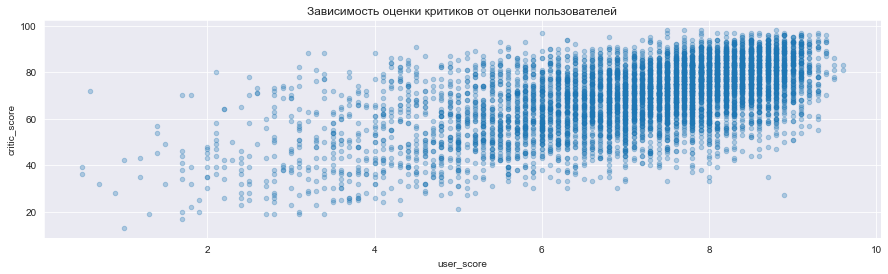

In [23]:
print(data['critic_score'].corr(data['user_score']))
data.plot(
    x = 'user_score', 
    y = 'critic_score', 
    kind = 'scatter', 
    title = 'Зависимость оценки критиков от оценки пользователей', alpha = 0.3,
    figsize = (15,4)
)
plt.show()

Корреляция прямая, но сильной зависимости нет. Ставим заглушки в обоих столбцах. Пусть будет `-1` чтобы ни с чем не спутать.

In [24]:
data[['user_score', 'critic_score']] = data[['user_score', 'critic_score']].fillna(-1)

#### 2.3.3 Убираем пропуски в `rating`

Общая идея заполнения пропусков в `rating`:

Игры в датафрейме зачастую выпускаются на нескольких плптформах. При этом, на одной платформе рейтинг может быть определен, а на другой - нет. Соответственно, мы можем выделить такие игры в отдельный словарь и по его значениям заполнить все пропуски

С другой стороны, игры на разных платформах могут отличаться друг от друга. Поэтому, для начала нам стоит посмотреть на количество таких игр в нашем датафрейме.

In [25]:
data['rating'] = data['rating'].fillna('undefined')

In [26]:
data.pivot_table(index = ['rating', 'game_name']) \
    .query('rating != "undefined"') \
    .query('game_name.duplicated(keep = False)') \
    .sort_values('game_name')

critic_score  eu_sales  jp_sales  na_sales  \
rating game_name                                                                
E      Astro Boy: The Video Game      34.000000  0.000000       0.0  0.090000   
E10+   Astro Boy: The Video Game      54.666667  0.013333       0.0  0.063333   
E      Avatar: The Last Airbender     64.000000  0.010000       0.0  0.300000   
E10+   Avatar: The Last Airbender     57.666667  0.040000       0.0  0.240000   
E      Barnyard                       56.000000  0.010000       0.0  0.030000   
...                                         ...       ...       ...       ...   
E10+   Young Justice: Legacy          -1.000000  0.000000       0.0  0.030000   
       Ys: The Ark of Napishtim       64.000000  0.000000       0.0  0.040000   
T      Ys: The Ark of Napishtim       72.000000  0.050000       0.0  0.070000   
E      de Blob 2                      75.000000  0.020000       0.0  0.080000   
E10+   de Blob 2                      76.666667  0.056667       0.0  0.106667   

                                   other_sales  user_score  year_of_release  
rating game_name                                                             
E      Astro Boy: The Video Game      0.010000   -1.000000           2009.0  
E10+   Astro Boy: The Video Game      0.006667    2.500000           2009.0  
E      Avatar: The Last Airbender     0.030000    6.400000           2006.0  
E10+   Avatar: The Last Airbender     0.013333    6.200000           2006.0  
E      Barnyard                       0.000000   -1.000000           2006.0  
...                                        ...         ...              ...  
E10+   Young Justice: Legacy          0.000000    7.100000           2013.0  
       Ys: The Ark of Napishtim       0.000000    7.300000           2006.0  
T      Ys: The Ark of Napishtim       0.020000    8.800000           2005.0  
E      de Blob 2                      0.010000    8.200000           2011.0  
E10+   de Blob 2                      0.020000    7.566667           2011.0  

[353 rows x 7 columns]

Таким образом, видим, что игры с разным рейтингом, исключая пропуски, повторяются в сводной таблице 353 раза. То есть всего игр из датафрейма, имеющих разный рейтинг минимум в 2 раза меньше. Посмотрим, сколько всего уникальных названий игр есть в датафрейме

In [27]:
len(data['game_name'].unique())

11560

In [28]:
len(data.query('rating != "undefined"')['game_name'].unique())

6066

Из 6066 повторяющихся названий игр, не имеющих пропусков в рейтинге, имеем 353 / 2 = 176 игр, где этот рейтинг различается

In [29]:
176 / 6066 * 100

2.90141773821299

судя по датасету, вероятность "не попасть" с подобной методикой проставления рейтинга всего 2,9%. Создадим словарь с ключами - названиями игр, значениями - рейтингом.

In [30]:
a = {}
def rating_determing(row):
    if row['game_name'] not in a and row['rating'] != 'undefined':
        a[row['game_name']] = row['rating']
data.apply(rating_determing, axis = 1)

0        None
1        None
2        None
3        None
4        None
         ... 
16708    None
16709    None
16710    None
16711    None
16712    None
Length: 16713, dtype: object

In [31]:
print(len(a))
display(a)

6066


{'Wii Sports': 'E',
 'Mario Kart Wii': 'E',
 'Wii Sports Resort': 'E',
 'New Super Mario Bros.': 'E',
 'Wii Play': 'E',
 'New Super Mario Bros. Wii': 'E',
 'Mario Kart DS': 'E',
 'Wii Fit': 'E',
 'Kinect Adventures!': 'E',
 'Wii Fit Plus': 'E',
 'Grand Theft Auto V': 'M',
 'Grand Theft Auto: San Andreas': 'M',
 'Brain Age: Train Your Brain in Minutes a Day': 'E',
 'Grand Theft Auto: Vice City': 'M',
 'Brain Age 2: More Training in Minutes a Day': 'E',
 'Gran Turismo 3: A-Spec': 'E',
 'Call of Duty: Modern Warfare 3': 'M',
 'Call of Duty: Black Ops': 'M',
 'Call of Duty: Black Ops II': 'M',
 'Call of Duty: Modern Warfare 2': 'M',
 'Grand Theft Auto III': 'M',
 'Super Smash Bros. Brawl': 'T',
 'Mario Kart 7': 'E',
 'Animal Crossing: Wild World': 'E',
 'Halo 3': 'M',
 'Gran Turismo 4': 'E',
 'Super Mario Galaxy': 'E',
 'Grand Theft Auto IV': 'M',
 'Gran Turismo': 'E',
 'Super Mario 3D Land': 'E',
 'Gran Turismo 5': 'E',
 'Call of Duty: Ghosts': 'M',
 'Just Dance 3': 'E10+',
 'New Super Ma

Выглядит так, что все получилось, имеем словарь, где ключ - название игры, а значение - рейтинг этой игры, который первый встречается в датафрейме. длина словаря совпадает с уникальными названиями игр, имеющих рейтинг. Теперь заполним пропуски

In [32]:
def rating_fillna(row):
    global a
    if row['rating'] == 'undefined' and row['game_name'] in a:
        return a[row['game_name']]
    elif row['rating'] != 'undefined':
        return row['rating']
    return 'undefined'

Применяем функцию и смотрим сколько пропусков заполнили

In [33]:
data['rating_1'] = data.apply(rating_fillna, axis = 1)
data.query('rating != rating_1')

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_1
71,Donkey Kong Country,SNES,1994.0,Platform,4.36,1.71,3.00,0.23,-1.0,-1.0,undefined,E
225,The Last of Us,PS4,2014.0,Action,1.88,2.00,0.07,0.77,-1.0,-1.0,undefined,M
232,The Legend of Zelda: A Link to the Past,SNES,1991.0,Action,2.42,0.91,1.15,0.13,-1.0,-1.0,undefined,E
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,-1.0,-1.0,undefined,E10+
279,Teenage Mutant Ninja Turtles,NES,1989.0,Action,3.38,0.44,0.31,0.04,-1.0,-1.0,undefined,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16587,Bomberman,Wii,2008.0,Puzzle,0.00,0.00,0.01,0.00,-1.0,-1.0,undefined,E
16598,Snood 2: On Vacation,GBA,2005.0,Puzzle,0.01,0.00,0.00,0.00,-1.0,-1.0,undefined,E
16643,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,-1.0,-1.0,undefined,M
16658,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,undefined,M


заполнили 437 пропусков. остальные значения заполнять нечем. Уберем ненужную колонку из датафрейма

In [34]:
data['rating'] = data['rating_1']
data.drop('rating_1', axis = 1, inplace = True)

### 2.4 Приведение данных к нужному типу

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


В предыдущих шагах почти все сделали, осталось привести `year_of_release` и `critic_score` в `int`

In [36]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')

## 3.Исследовательский анализ

### 3.1 Зависимость количества выпускаемых игр по годам

построим гистограмму

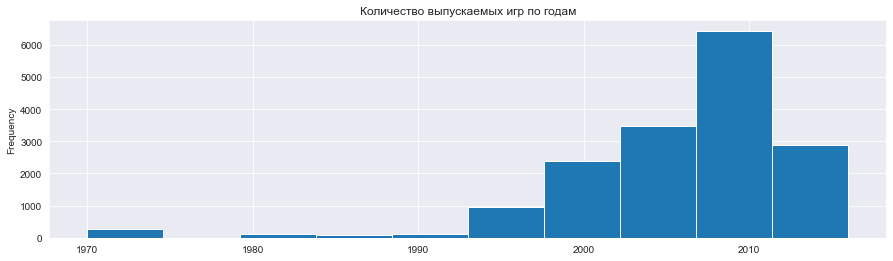

In [37]:
data['year_of_release'].plot(kind = 'hist', figsize = (15,4), title = 'Количество выпускаемых игр по годам')
plt.show()

1970 - тот год, на который мы заменили все пропуски, в период с 1980 по 1990 выпускается довольно мало игр. взглянем ближе на срез

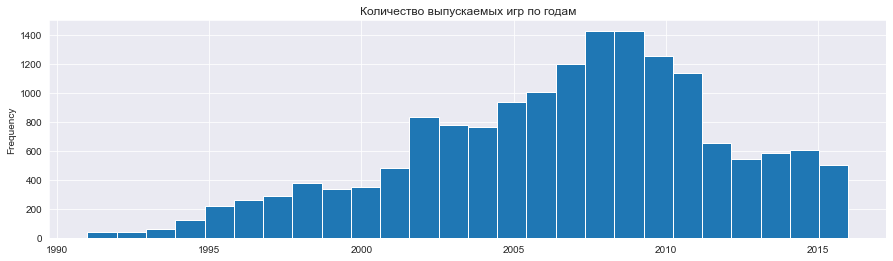

In [38]:
data.query('year_of_release > 1990')['year_of_release'] \
    .plot(bins = 26, kind = 'hist', figsize = (15,4), title = 'Количество выпускаемых игр по годам')
plt.show()

С 1990 года количество выпущенных игр росло, в 2008 году достигли пика, а затем, в 2012 году испытали резкий спад и держатся на одном уровне. Вероятно, влияние оказали 2 фактора:
- Переход пользователей на игры для смартфонов.
- Мировой финансовый кризис 2008 года

Предполагаем, что нам важен период с 2012 по 2016 год.

### 3.2 Зависимость количества продаваемых игр по платформам

Суммируем все продажи

In [39]:
data['total_sales'] = data['eu_sales'] + data['na_sales'] + data['jp_sales'] + data['other_sales']

Посмотрим на общую картину по продажам по годам

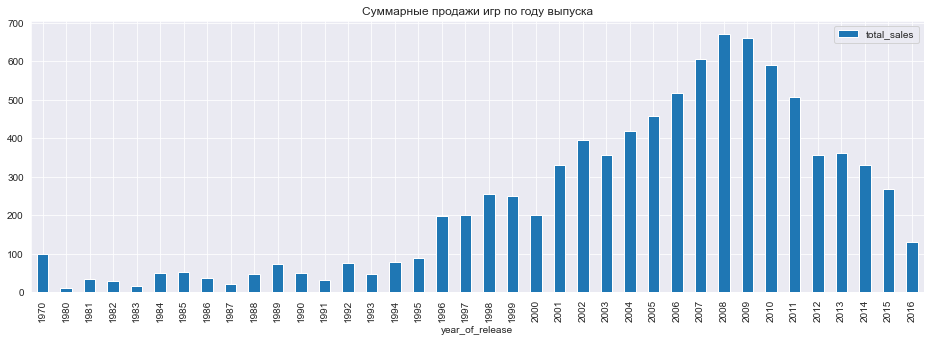

In [40]:
data.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
    .plot(kind = 'bar', figsize = (16,5))
plt.title('Суммарные продажи игр по году выпуска')
plt.show()

Видим похожую картину, количество продаж падает, как падает и количество выпускаемых игр

Выделим платформы с наибольшими суммарными продажами

In [41]:
data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
    .sort_values('total_sales', ascending = False)\
    .head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


PS2 по итогам всех периодом с большим отрывом обогнала конкурентов. Посмотрим на распределение 5 лучших по годам.

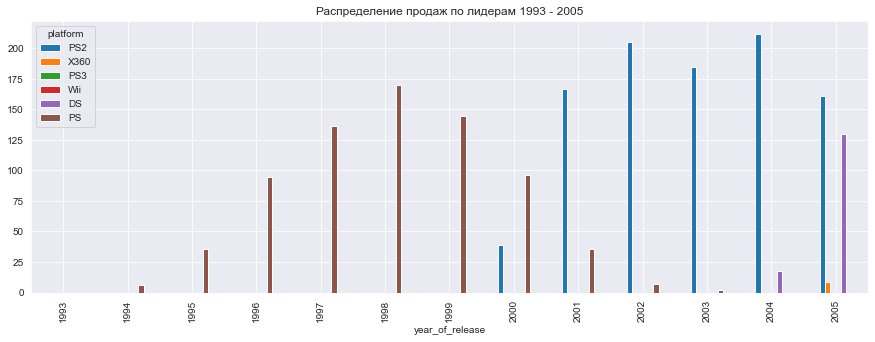

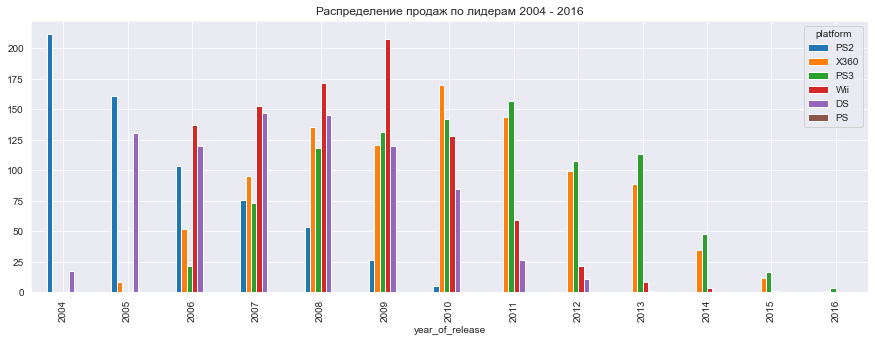

In [42]:
data.pivot_table(index = 'year_of_release', values = 'total_sales', columns = 'platform',aggfunc = 'sum')\
    .reset_index()\
    .loc[:, ['year_of_release','PS2','X360','PS3','Wii','DS', 'PS']]\
    .query('1993 <= year_of_release <= 2005')\
    .plot(kind = 'bar', x = 'year_of_release', figsize = (15,5))
plt.title('Распределение продаж по лидерам 1993 - 2005')

plt.show()

data.pivot_table(index = 'year_of_release', values = 'total_sales', columns = 'platform',aggfunc = 'sum')\
    .reset_index()\
    .loc[:, ['year_of_release','PS2','X360','PS3','Wii','DS', 'PS']]\
    .query('2004 <= year_of_release')\
    .plot(kind = 'bar', x = 'year_of_release', figsize = (15,5))
plt.title('Распределение продаж по лидерам 2004 - 2016')

plt.show()

Посчитаем медианное значение полного цикла жизни платформы

In [43]:
life_cycle = []
for platf in data['platform'].unique():
    max_year = data.query('platform == @platf and year_of_release > 1970')['year_of_release'].max()
    min_year = data.query('platform == @platf and year_of_release > 1970')['year_of_release'].min()
    life_cycle.append(max_year - min_year + 1)
np.median(life_cycle)

7.0

**Вывод: новые консоли сменяют старые, полный цикл жизни составляет 7-10 лет (медианный 7 лет), актуальность посмотрим по распределению выходящих игр**

Попробуем определить, что же все - таки случилось в период с 2005 по 2012 годы. Почему резкий рост продаж сменился спадом? Да, этот период совпадал и с мировым финансовым кризисом и с популяризацией мобильных игр. Но, возможно, мы просто попали на пики жизненных циклов платформ?

In [44]:
data.query('2005 <= year_of_release <= 2012')\
    .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
    .sort_values('total_sales', ascending = False)\
    .head(10)

,total_sales
platform,
Wii,877.52
X360,824.44
DS,783.95
PS3,750.39
PS2,426.46
PSP,278.97
PC,128.36
3DS,114.56
XB,59.85


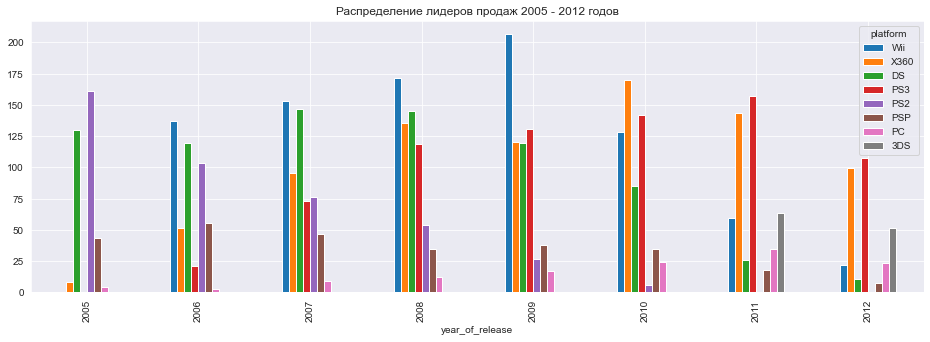

In [45]:
data.pivot_table(index = 'year_of_release', values = 'total_sales', columns = 'platform',aggfunc = 'sum')\
    .reset_index()\
    .loc[:, ['year_of_release','Wii','X360','DS','PS3','PS2', 'PSP','PC','3DS']]\
    .query('2005 <= year_of_release <= 2012')\
    .plot(kind = 'bar', x = 'year_of_release', figsize = (16,5))
plt.title('Распределение лидеров продаж 2005 - 2012 годов')
plt.show()

**Вывод: Период 2007, 2008, 2009 годов ознаменовался пиками популярности таких платформ как Wii, X360, DS, PS3. То есть, предыдущее предположение было неверно. Мы не видим спада продаж после какого-то определенного года. Просто друг на друга наложились пики жизненных циклов платформ**

Теперь посмотрим на срез с 2012 года

In [46]:
data.query('year_of_release >= 2012')\
    .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
    .sort_values('total_sales', ascending = False)\
    .head(6)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19


В основном, тренде уже другие платформы. Не стоит забывать, что часть продаж у нас "съел" 1970 год. Оценим их

In [47]:
data.query('year_of_release == 1970')\
    .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
    .sort_values('total_sales', ascending = False)\
    .head(5)

,total_sales
platform,
PS2,22.21
Wii,16.33
2600,10.50
X360,10.18
PS3,7.83


Пропуски в годе не сильно повлияли на интересующий срез. Визуализируем лидеров

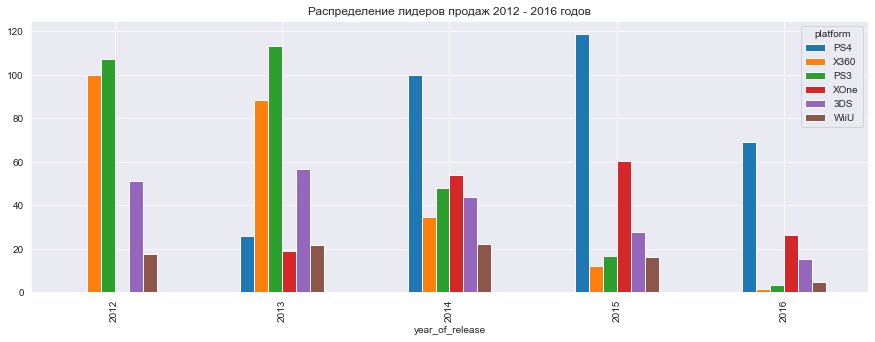

In [48]:
data.pivot_table(index = 'year_of_release', values = 'total_sales', columns = 'platform',aggfunc = 'sum')\
    .reset_index()\
    .loc[:, ['year_of_release','PS4','X360','PS3','XOne','3DS', 'WiiU']]\
    .query('year_of_release >= 2012')\
    .plot(kind = 'bar', x = 'year_of_release', figsize = (15,5))
plt.title('Распределение лидеров продаж 2012 - 2016 годов')
plt.show()

Внимательнее посмотрим на 3DS, т.к. по предыдущим графикам не ясно когда пошли продажи.

In [49]:
data.query('platform == "3DS" and year_of_release > 2008')\
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

,total_sales
year_of_release,
2011,63.20
2012,51.36
2013,56.57
2014,43.76
2015,27.78
2016,15.14


Если ранее мы видели, что платформы плавно сменяются, то выход 3DS в 2011 встретил ажиотаж, затем продажи падали.

**PS3, X360 и WiiU к 2016 явно отжили свое и в 2017 и ставку на них делать не стоит.
XOne также имеет понижательный тренд, но эту платформу, наверное, еще рано скидывать со счетов, особенно, учитывая, что рынок падает. Стоит изучить готовящиеся релизы.**

**Идея: а что, если нам попытаться найти "восходящую звезду"? Ведь в срез лидеров 2012-2016 года она явно не попала.**

In [50]:
data.query('year_of_release >= 2015')\
    .pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')\
    .unstack()

total_sales       
year_of_release        2015   2016
platform                          
3DS                   27.78  15.14
PC                     8.52   5.25
PS3                   16.82   3.60
PS4                  118.90  69.25
PSP                    0.12    NaN
PSV                    6.25   4.25
Wii                    1.14   0.18
WiiU                  16.35   4.60
X360                  11.96   1.52
XOne                  60.14  26.15

Таких платформ нет, продажи везде падают. Стоит учесть, что данные за 2016 год неполные, но тренд все равно ясен.

### 3.3 Определим актуальный период.

В предыдущий данных мы определили что:
- цикл жизни одной платформы составляет 7-10 лет
- начало цикла жизни платформы может сопровождаться как ажиотажем, так и плавным ростом с нуля
- лидерами в последние годы являются PS4:
    - PS4 - продажи начались в 2013 году
    - XOne - продажи начались в 2013 году
    - 3DS - учитывая жизненный цикл в 7-10 лет и начало продаж в 2011, отживает свое. Вероятно, что Nintendo в скором времени выпустит замену
    
**Вывод: текущие лидеры PS4 и XOne находятся в середине своего жизненного цикла. Цикл PS3 и X360 подошел к концу. Цикл 3DS заканчивается и компания анонсировала выход новой платформы Nintendo Switch. Учитывая предыдущие периоды, можно ожидать как ажиотажный спрос, так и плавный рост продаж. Актуальный период для исследования ограничим 2014 годом, таким образом отсечем теряющие популярность платформы, но все равно получим достаточную выборку, которая будет соответствовать последним трендам**

In [51]:
data_act = data.query('year_of_release >= 2014')

Оценим выборку

In [52]:
data_act.pivot_table(index = 'platform', values = 'total_sales', aggfunc = ['sum', 'count'])\
    .sort_values(('sum','total_sales'),ascending = False)\
    .head(20)

,sum,count
,total_sales,total_sales
platform,,
PS4,288.15,376
XOne,140.36,228
3DS,86.68,212
PS3,68.18,219
X360,48.22,111
WiiU,42.98,73
PC,27.05,151
PSV,22.40,295


Выборки по PSP и Wii невелики. Будем держать это в голове

### 3.4 Диаграммы размаха

Построим диаграммы размаха в разбивке по платформам

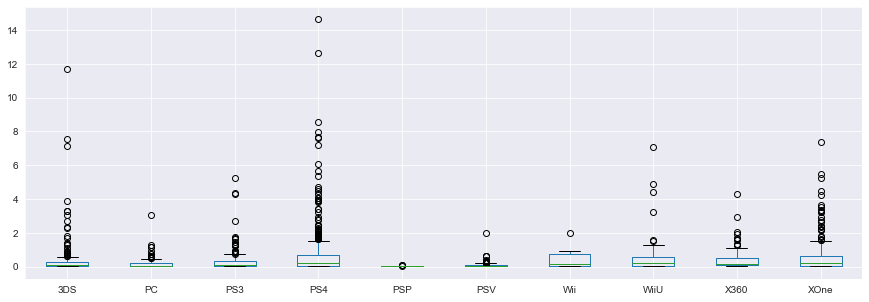

In [53]:
data_act.pivot_table(index = 'game_name', values = 'total_sales', columns = 'platform', aggfunc = 'sum')\
        .plot(kind = 'box', figsize = (15,5))
plt.show()

Выбросы на данном графике характеризуют "бестселеры". Рассмотрим детальнее

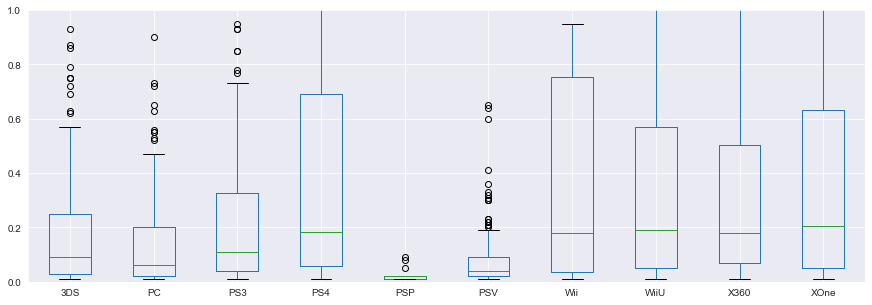

In [54]:
data_act.pivot_table(index = 'game_name', values = 'total_sales', columns = 'platform', aggfunc = 'sum')\
        .plot(kind = 'box', figsize = (15,5), ylim = (0, 1))
plt.show()

Лидеры на то и лидеры, что на них в среднем игры продаются лучше.
50% игр, продающихся на приставках PS4, имеют около 200 тысяч продаж, а значения третьего квартиля дотягивают до 600-700 тысяч загрузок. 

Видно, как теряет популярность PS3, игры после 2014 раскупаются хуже чем у PS4.

Неожиданно хорошо смотрятся WiiU и Wii (с последней спорно, выборка невелика). Несмотря на то, что общие продажи в этих приставках довольно малы (как мы выяснили ранее), около 50% игр могут посоперничать с PS4 

Похожая ситуация у X360 и XOne от Microsoft. Чуть хуже 3DS

Игры на PSP b Vita продаются из рук вон плохо

### 3.5 Считаем корреляцию продаж на популярных платформах с отзывами критиков

#### 3.5.1 Считаем корреляцию продаж на PS4 с отзывами критиков

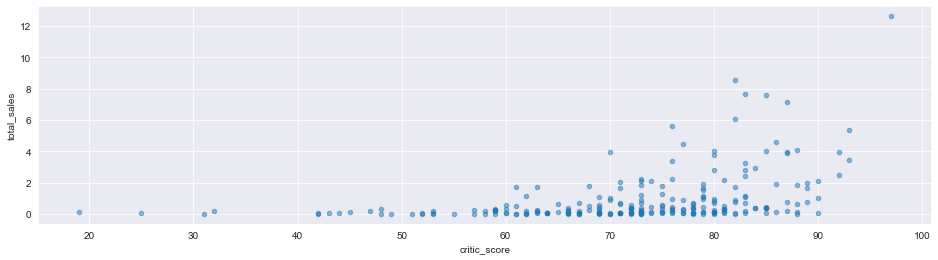

In [55]:
data_act.query('platform == "PS4" and critic_score != -1')\
        .plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (16,4), alpha = 0.5)
plt.show()

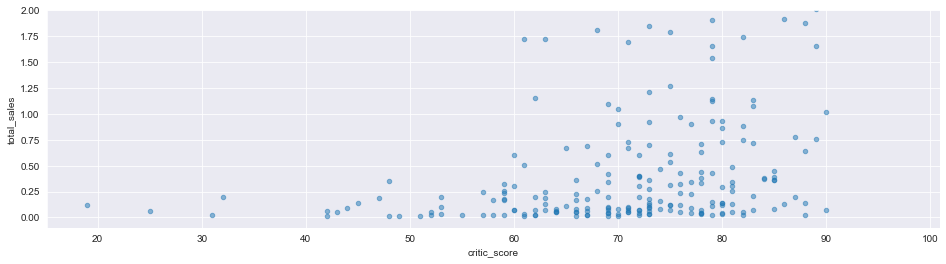

In [56]:
data_act.query('platform == "PS4" and critic_score != -1')\
        .plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (16,4), alpha = 0.5, ylim = (-0.1,2))
plt.show()

Видно, что почти все игры с плохими оценками (<50) имеют меньше полумиллиона скачиваний, но таких игр не очень много. Основная масса имеет значения 60+ баллов. И там довольно сильный разброс. Корреляция есть, но слабая. Подтвердим расчетами.

In [57]:
data_act.query('platform == "PS4" and critic_score != -1')['total_sales']\
        .corr(data_act.query('platform == "PS4" and critic_score != -1')['critic_score'])

0.40266141068104094

In [58]:
data_act['total_sales'].corr(data_act.query('platform == "PS4" and critic_score != -1')['critic_score'])

0.40266141068104094

И расчеты это подтверждают

**Вывод: оценки критиков положительно коррелируют с продажами игр на PS4, но зависимость слабая. Игры с явно плохими отзывами продаются плохо**

#### 3.5.2. Считаем корреляцию продаж на XOne с отзывами критиков

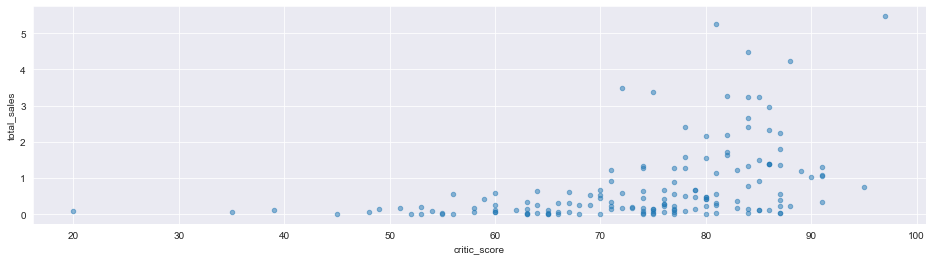

In [59]:
data_act.query('platform == "XOne" and critic_score != -1')\
        .plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (16,4), alpha = 0.5)
plt.show()

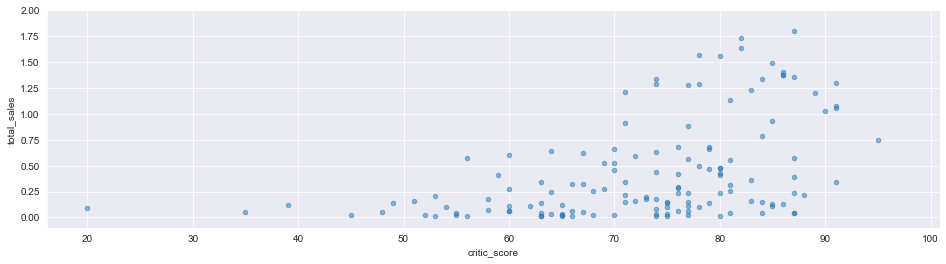

In [60]:
data_act.query('platform == "XOne" and critic_score != -1')\
        .plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (16,4), alpha = 0.5, ylim = (-0.1,2))
plt.show()

In [61]:
data_act['total_sales'].corr(data_act.query('platform == "XOne" and critic_score != -1')['critic_score'])

0.42867694370333187

Похожая картина, корреляция чуть сильнее

**Вывод: оценки критиков положительно коррелируют с продажами игр на XOne, но зависимость слабая. Игры с явно плохими отзывами продаются плохо**

#### 3.5.3. Считаем корреляцию продаж на 3DS с отзывами критиков

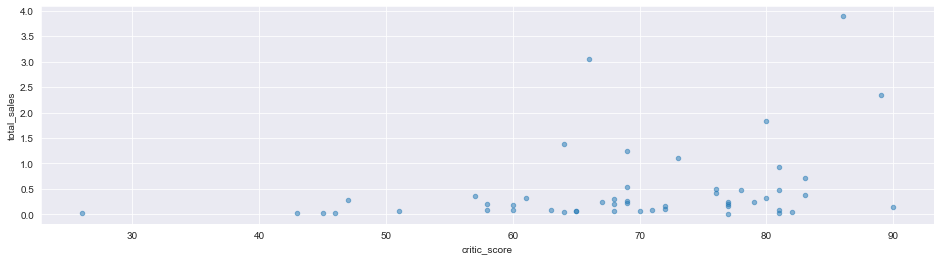

In [62]:
data_act.query('platform == "3DS" and critic_score != -1')\
        .plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (16,4), alpha = 0.5)
plt.show()

Сложно что-либо понять по этому распределению. Видимо, в изначальном датафрейме было много отсутствующих значений

Посмотрим на все платформы вкупе

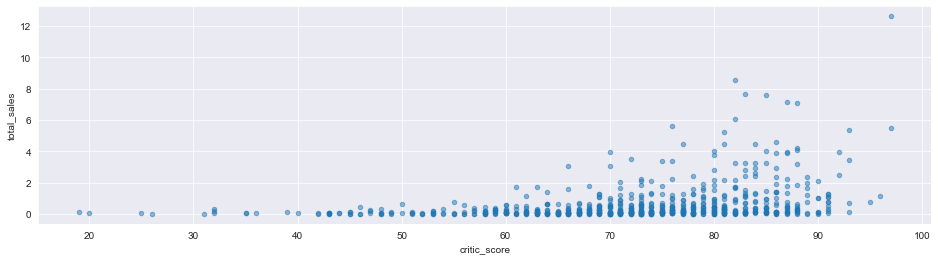

In [63]:
data_act.query('critic_score != -1')\
        .plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (16,4), alpha = 0.5)
plt.show()

Похожая картина с лидерами

In [64]:
data_act['total_sales'].corr(data_act[data_act['critic_score'] != -1]['critic_score'])

0.32810508696636315

Общая корреляция слабая

**Вывод: Оценки критиков имеют слабую положительную корреляцию с продажами. Игры с оценками ниже 60 продаются плохо**

### 3.6 Смотрим распределение продаж игр по разным жанрам

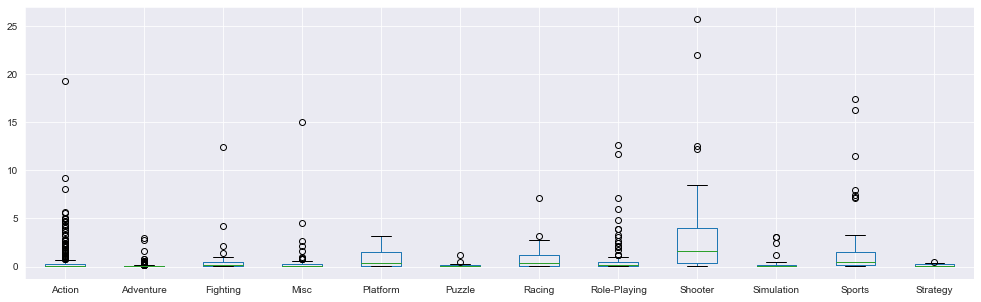

In [65]:
data_act.pivot_table(index = 'game_name', values = 'total_sales', columns = 'genre', aggfunc = 'sum')\
        .plot(kind = 'box', figsize = (17,5))
plt.show()

Выбросы снова характеризуют бестселлеры. Увеличим масштаб

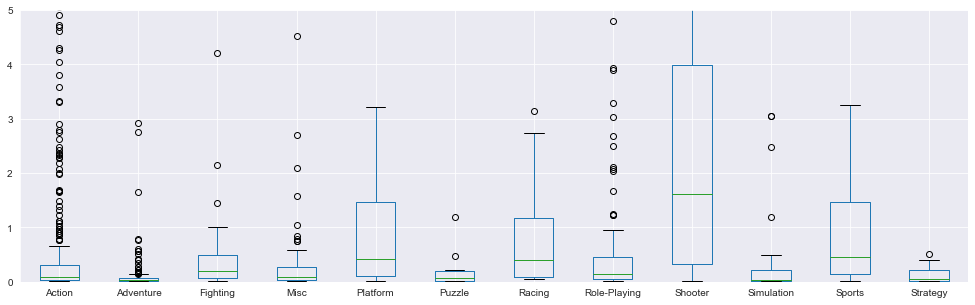

In [66]:
data_act.pivot_table(index = 'game_name', values = 'total_sales', columns = 'genre', aggfunc = 'sum')\
        .plot(kind = 'box', figsize = (17,5), ylim = (0,5))
plt.show()

Очень в среднем продаются шутеры, с большим отставанием игры жанра спорт, гонки и платформеры. Стоит также обратить внимание на экшены. Хоть большинство из них продаются плохо, самые популярные приносят хорошую выручку. 

Нужно учитывать, что игры, как правило, не относятся к какому - то одному жанру. Но данные приписывают каждой игре только один жанр.

**Общий вывод по разделу**
- новые консоли сменяют старые, актуальность теряется за срок в 7 - 10 лет. Медианное значение 7 лет
- рост числа продаж игр для определенной платформы определяется ее новизной, при устаревании платформы на нее выпускается и продается меньше игр
- стоит обратить внимание на выход новой приставки от Nintendo
- платформы PS4 и XOne находятся в середине своего жизненного цикла, стоит также сделать акцент на них
- оценки критиков слабо влияют на продажи игры
- Шутеры, спорт, гонки и платформеры - самые популярные жанры. В экшенах следует внимательно отнестись к предлагаемому ассортименту. Нужно учитывать, что игры как правило не относятся к одному жанру

## 4. Составление портретов пользователей каждого региона

### 4.1 По популярных платформам по регионам

#### 4.1.1 Северная Америка

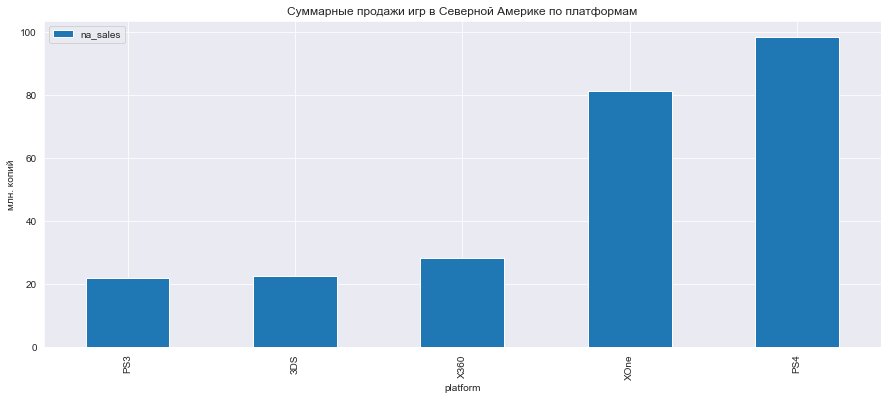

In [67]:
data_act.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')\
        .sort_values('na_sales')\
        .tail(5)\
        .plot(kind = 'bar', figsize = (15,6))
plt.title('Суммарные продажи игр в Северной Америке по платформам')
plt.ylabel("млн. копий")
plt.show()

**Вывод: Пользователи Северной Америки больше всего играют в приставки Microsoft, Sony, лидеры PS4 и XOne на третьем месте X360. Nintendo с единственной приставкой на четвертом месте**

#### 4.1.2 Европа

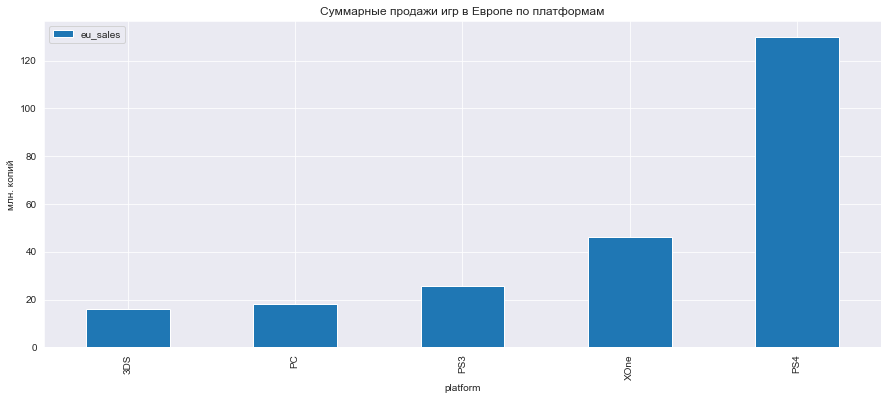

In [68]:
data_act.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')\
        .sort_values('eu_sales')\
        .tail(5)\
        .plot(kind = 'bar', figsize = (15,6))
plt.title('Суммарные продажи игр в Европе по платформам')
plt.ylabel("млн. копий")
plt.show()

**Вывод: Европейские пользователи предпочитают приставки Sony PS4, на втором с большим отставанием XOne от Microsoft, PS3, PC и Nintendo идут следом**

#### 4.1.3 Япония

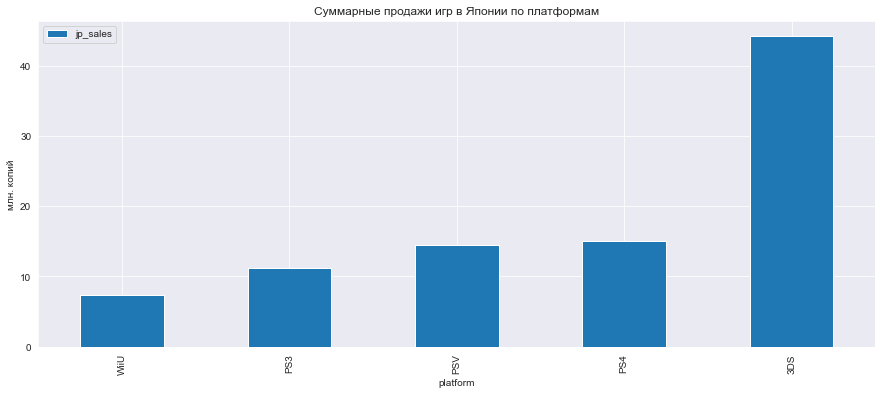

In [69]:
data_act.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')\
        .sort_values('jp_sales')\
        .tail(5)\
        .plot(kind = 'bar', figsize = (15,6))
plt.title('Суммарные продажи игр в Японии по платформам')
plt.ylabel("млн. копий")
plt.show()

**Вывод: Японские игроки предпочитают Nintendo и Sony, причем мобильный сегмент Sony тоже смотрится неплохо, WiiU на последнем месте из топ-5**

#### 4.1.4 Остальной мир

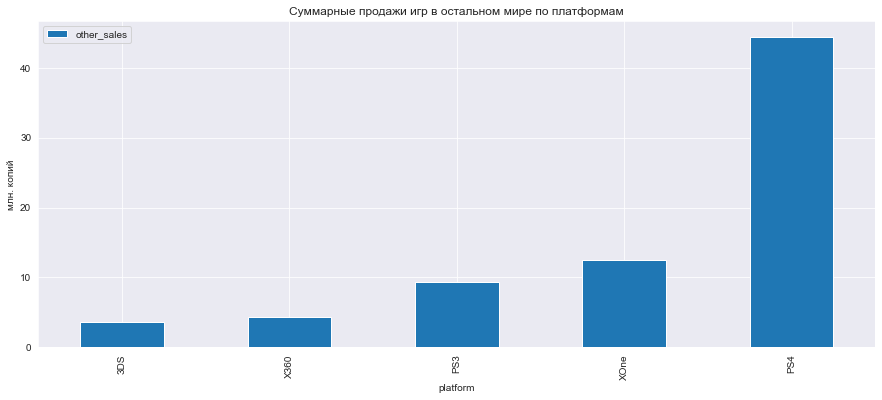

In [70]:
data_act.pivot_table(index = 'platform', values = 'other_sales', aggfunc = 'sum')\
        .sort_values('other_sales')\
        .tail(5)\
        .plot(kind = 'bar', figsize = (15,6))
plt.title('Суммарные продажи игр в остальном мире по платформам')
plt.ylabel("млн. копий")
plt.show()

**Вывод: в остальном мире больше всего популярны Sony PS4, Microsoft XOne на втором месте с большим отставанием, далее идут PS3, X360 и 3DS**

Посмотрим суммарно

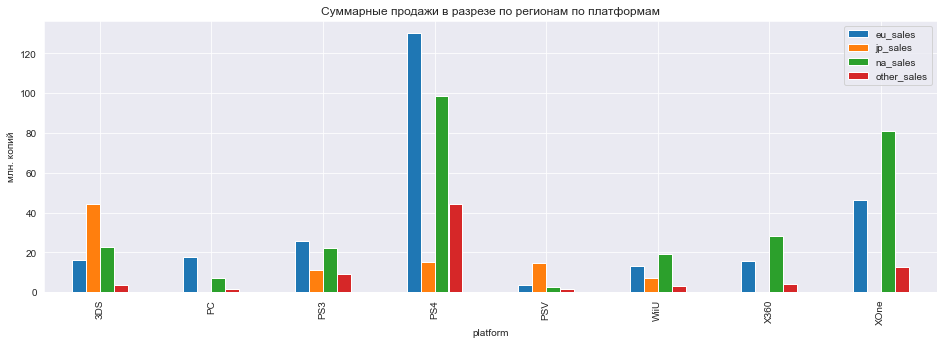

In [71]:
data_act.query('platform not in ["Wii", "PSP"]')\
        .pivot_table(index = 'platform', values = ['jp_sales', 'eu_sales', 'na_sales', 'other_sales'], aggfunc = 'sum')\
        .reset_index()\
        .plot(kind = 'bar', x = 'platform', figsize = (16,5))
plt.title('Суммарные продажи в разрезе по регионам по платформам')
plt.ylabel("млн. копий")
plt.show()

**Общий вывод по разделу: больше всего следует сосредоточится на:**
- Microsoft (1) и Sony (2) в Северной Америке (PS4 и XOne)
- Sony PS4 в Европе, в меньшей степени на XOne от Microsoft
- Nintendo в Японии, упор на выход Switch, в меньшей степени по Sony PS4 и PSV. Приставки от Miscrosoft там совсем не любят
- Sony в остальном мире, в меньшей степени Microsoft XOne

### 4.2 По популярным жанрам по регионам

#### 4.2.1 Северная Америка

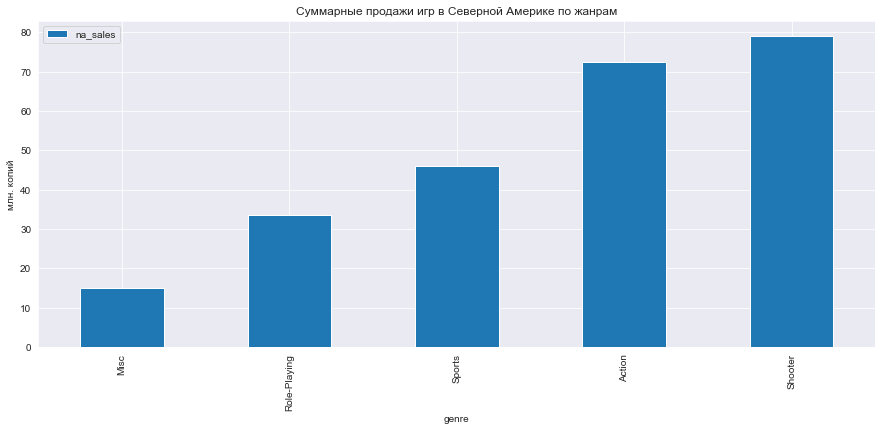

In [72]:
data_act.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')\
        .sort_values('na_sales')\
        .tail(5)\
        .plot(kind = 'bar', figsize = (15,6))
plt.title('Суммарные продажи игр в Северной Америке по жанрам')
plt.ylabel("млн. копий")
plt.show()

Больше всего в Северной Америке популярны Экшены и Шутеры, затем идут Спорт и РПГ, и на пятом месте смешанный жанр 

#### 4.2.2 Европа

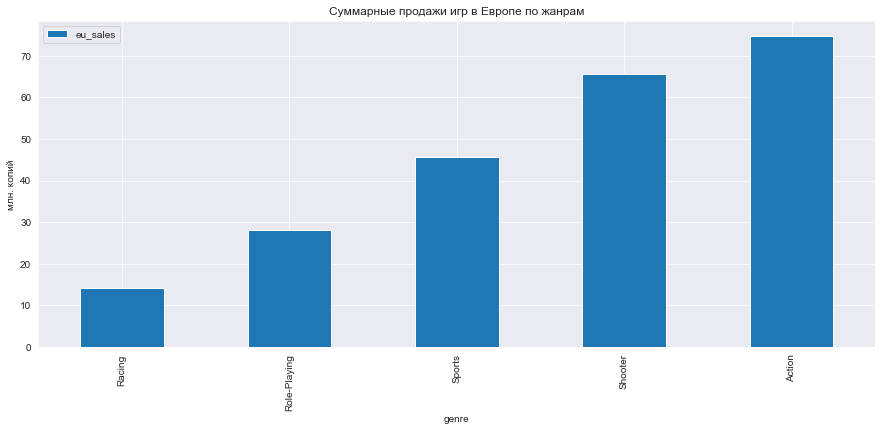

In [73]:
data_act.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')\
        .sort_values('eu_sales')\
        .tail(5)\
        .plot(kind = 'bar', figsize = (15,6))
plt.title('Суммарные продажи игр в Европе по жанрам')
plt.ylabel("млн. копий")
plt.show()

Распределение по топ-5 напоминает США, за исключением смешанного жанра. В Европе это гонки

#### 4.2.3 Япония

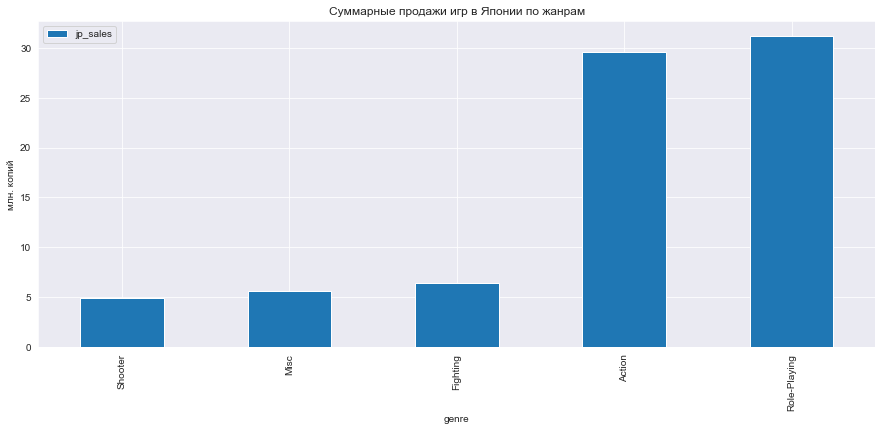

In [74]:
data_act.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')\
        .sort_values('jp_sales')\
        .tail(5)\
        .plot(kind = 'bar', figsize = (15,6))
plt.title('Суммарные продажи игр в Японии по жанрам')
plt.ylabel("млн. копий")
plt.show()

Японские игроки обожают РПГ и Экшены, доля остальных жанров сильно меньше.

#### 4.2.4 Остальной мир

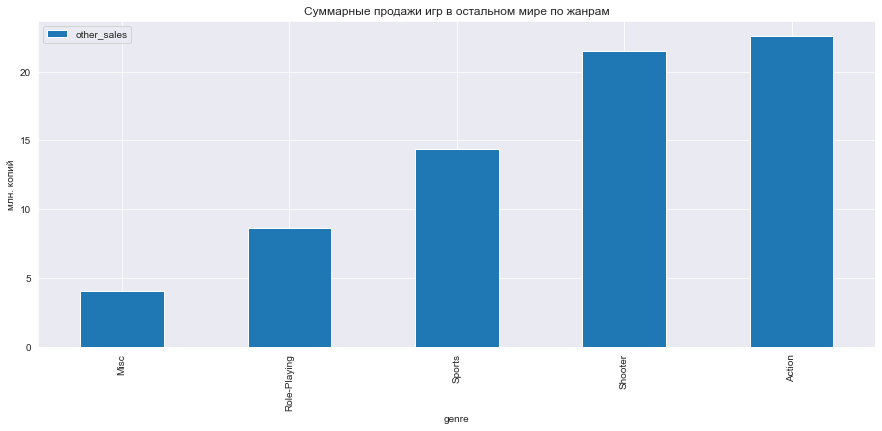

In [75]:
data_act.pivot_table(index = 'genre', values = 'other_sales', aggfunc = 'sum')\
        .sort_values('other_sales')\
        .tail(5)\
        .plot(kind = 'bar', figsize = (15,6))
plt.title('Суммарные продажи игр в остальном мире по жанрам')
plt.ylabel("млн. копий")
plt.show()

В остальном мире предпочтение отдают Экшенам, затем идут Шутеры, Спорт, РПГ и смешанный жанр

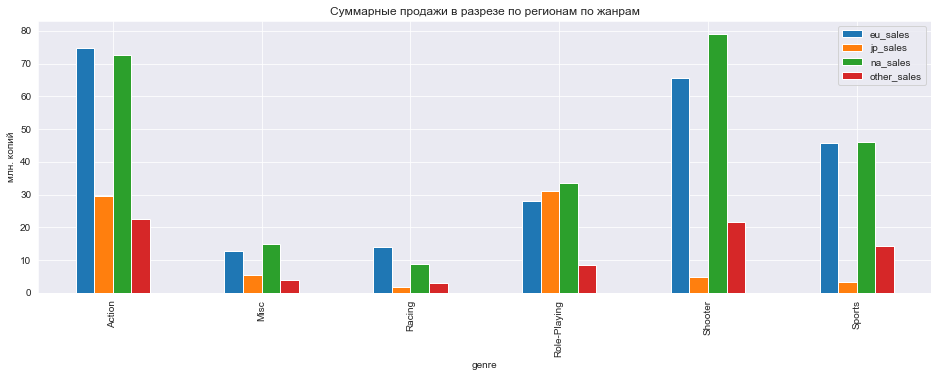

In [76]:
data_act.query('genre in ["Action", "Sports", "Racing", "Role-Playing", "Misc", "Shooter"]')\
        .pivot_table(index = 'genre', values = ['jp_sales', 'eu_sales', 'na_sales', 'other_sales'], aggfunc = 'sum')\
        .reset_index()\
        .plot(kind = 'bar', x = 'genre', figsize = (16,5))
plt.title('Суммарные продажи в разрезе по регионам по жанрам')
plt.ylabel("млн. копий")
plt.show()

**Общий вывод по разделу: следует сконцентрироваться на продаже Экшенов, Шутеров, РПГ и спортивного жанра в Европе, Америке и остальном мире, кроме Японии, там популярны РПГ и Экшены, с большим отрывом от других жанров**

### 4.3 Проверка влияния ESRB рейтинга на продажи по регионам

Посмотрим на распределение суммарные продажи игр определенного рейтинга по регионам

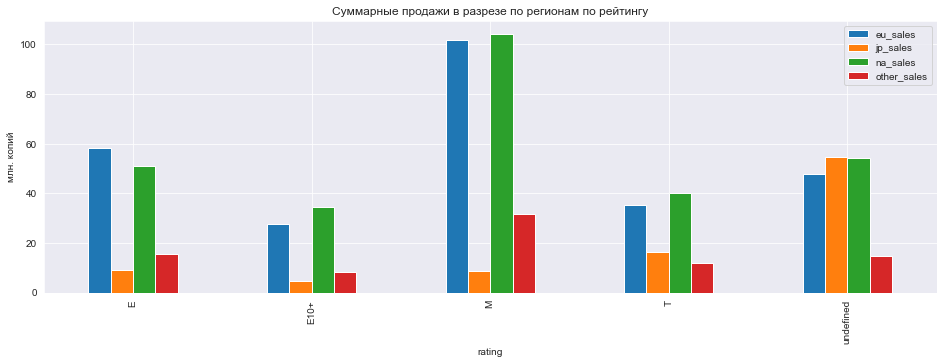

In [77]:
data_act.pivot_table(index = 'rating', values = ['jp_sales', 'eu_sales', 'na_sales', 'other_sales'], aggfunc = 'sum')\
        .reset_index()\
        .plot(kind = 'bar', x = 'rating', figsize = (16,5))
plt.title('Суммарные продажи в разрезе по регионам по рейтингу')
plt.ylabel("млн. копий")
plt.show()

- В СА и Европе больше всего покупают игры с рейтингом `M (17+)`, сильно меньше с рейтингом `E (для всех)`, `T` (от 10 и от 13 лет) занимают третье место, `E10+` на последнем. Слишком много пропусков в данных, поэтому с последними тремя есть вероятность ошибки
- В Японии игры с рейтингом `T` более популярны, чем `M` и `E`. К сожалению, очень высока вероятность ошибки именно здесь, т.к. больше всего продаж имеют игры, где в данных пропущен рейтинг
- остальной мир предпочитает рейтинг `M`

Посмотрим распределение продаж игр по странам

#### 4.3.1 Распределение для Японии

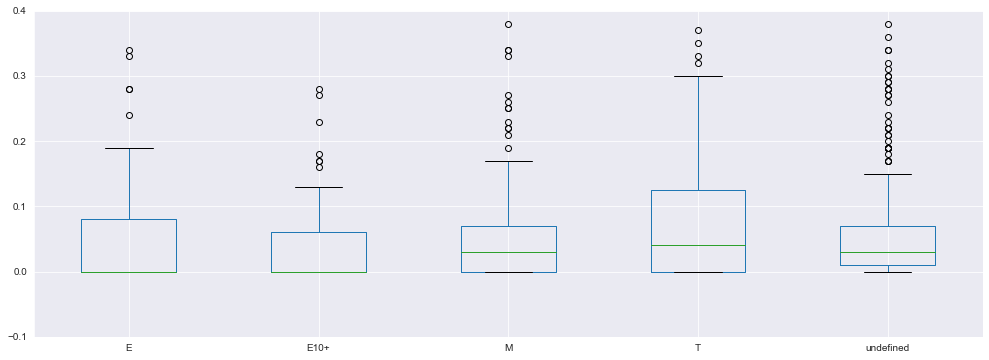

In [78]:
data_act.pivot_table(index = 'game_name', values = 'jp_sales', columns = 'rating', aggfunc = 'sum')\
        .plot(kind = 'box', figsize = (17,6),ylim = (-0.1,0.4))
plt.show()

**Вывод:**
не менее 50% всех существующих игр рейтинга `E` и `E10+` имеют шанс быть никогда не приобретенными в Японии. Вклад в суммарные продажи дают остальные 50% игр и бестселлеры (выбросы). Рейтинг `M` имеет похожее с рейтингом `T` распределение.
Для продажи игр в этом регионе нужно тщательно подходить к выбору предлагаемых игр рейтингов `E` и `E10+`, т.к. они могут быть просто никогда не проданы. Хотя сам по себе рейтинг `E` все равно популярен.

Высока вероятность ошибки в выводах из-за кучи отсутствующих значений

#### 4.3.2 Распределение для CA

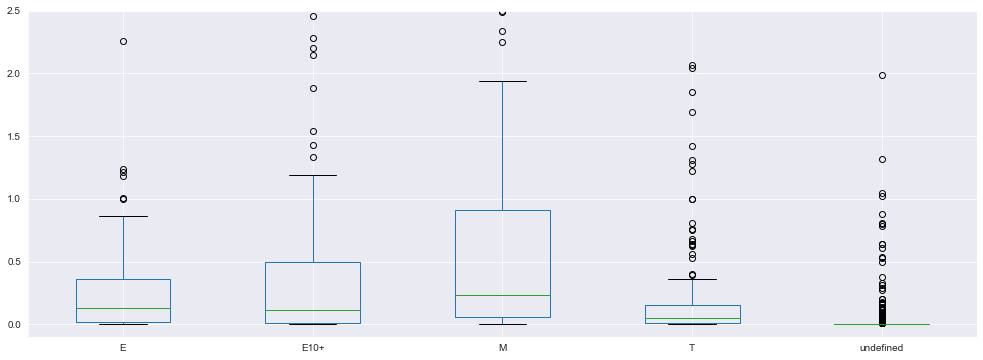

In [79]:
data_act.pivot_table(index = 'game_name', values = 'na_sales', columns = 'rating', aggfunc = 'sum')\
        .plot(kind = 'box', figsize = (17,6),ylim = (-0.1,2.5))
plt.show()

**Вывод**:
Тут уже другая история. Видно, что пользователи менее разборчивы для игр определенного рейтинга, но `M` все же лидирует. Почти любые игры так или иначе продаются. Кроме `T`

#### 4.3.3 Распределение для Европы

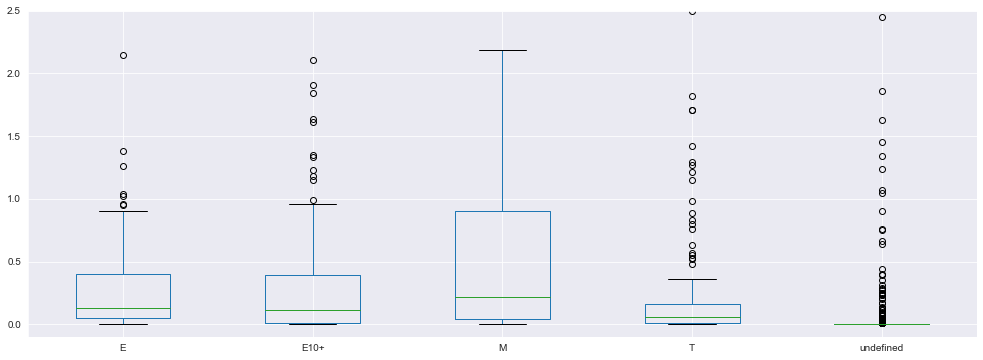

In [80]:
data_act.pivot_table(index = 'game_name', values = 'eu_sales', columns = 'rating', aggfunc = 'sum')\
        .plot(kind = 'box', figsize = (17,6),ylim = (-0.1,2.5))
plt.show()

**Вывод:**
Распределение похоже на СА

#### 4.3.4 Распределение для остальных стран

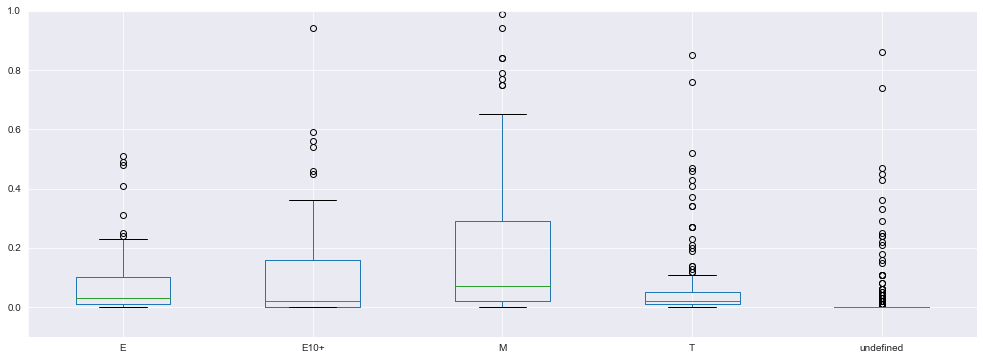

In [81]:
data_act.pivot_table(index = 'game_name', values = 'other_sales', columns = 'rating', aggfunc = 'sum')\
        .plot(kind = 'box', figsize = (17,6),ylim = (-0.1,1))
plt.show()

**Вывод**:
для игр рейтинга `E`, `E10+`, `T` в остальных странах необходимо тщательно работать над предлагаемым ассортиментом

**Общий вывод по разделу:**

Разные регионы отдают разное предпочтение разным рейтингам. В Японии популярны игры с рейтингом `E` и `T`(очень спорно из-за отсутствующих значений в данных), остальные отдают предпочтение рейтингу `M`

Необходимо тщательно подходить к предлагаемому ассортименту игр в остальных странах по рейтингам `E` и `T`. 

Особенно сильно подобная картина проявляется в Японии с рейтингом `E`. Несмотря на общую популярность данного рейтинга, 50% игр этого рейтинга там просто не продаются. Вероятно, что это зависит от пользовательских предпочтений. Но истинные причины этого неизвестны и нужно проводить дополнительное исследование. Возможно, что какие-то игры просто недоступны или не предлагаются пользователям. 

## 5. Проверка гипотез

Необходимо проверить 2 гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

### 5.1 Проверка первой гипотезы

Сформулируем $ H_0 $ и $ H_1 $

$ H_0 $: Пользовательские рейтинги платформ Xbox One и PC не различаются

$ H_1 $: Пользовательские рейтинги платформ Xbox One и PC различаются

Для этого нам нужно сравнить между собой 2 выборки из переменной `data_act`.

Воспользуемся методом `scipy.stats.ttest_ind` для проверки гипотезы о равенстве средних двух генеральных совокупностей.
Уровень aplha примем равным 0.05

проверим количество игр в выборках

In [82]:
pc_sample = data_act.query('platform == "PC" and user_score >= -0.5')
print(len(pc_sample))
xone_sample = data_act.query('platform == "XOne" and user_score >= -0.5')
print(len(xone_sample))

122
165


Выборки отличаются по размеру и есть основания полагать, что дисперсии в них тоже могут отличаться

In [83]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(pc_sample['user_score'], xone_sample['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
Нет оснований полагать, что пользовательские рейтинги игр зависят от платформы

### 5.2 Проверка второй гипотезы

Сформулируем $ H_0 $ и $ H_1 $

$ H_0 $: Пользовательские рейтинги жанров Action и Sports одинаковые

$ H_1 $: Пользовательские рейтинги жанров Action и Sports разные

Для этого нам нужно сравнить между собой 2 выборки из переменной `data_act`.

Воспользуемся методом `scipy.stats.ttest_ind` для проверки гипотезы о равенстве средних двух генеральных совокупностей.
Уровень aplha примем равным 0.05

проверим количество игр в выборках

In [84]:
action_sample = data_act.query('genre == "Action" and user_score >= -0.5')
print(len(action_sample))
sports_sample = data_act.query('genre == "Sports" and user_score >= -0.5')
print(len(sports_sample))

297
127


Выборки также значимо отличаются по размерам

In [85]:
alpha = 0.05

results = st.ttest_ind(action_sample['user_score'], sports_sample['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:**
Вероятность случайного получения настолько сильно различающихся значений слишком низка. 
Есть основания полагать, что пользовательские рейтинги игр жанров Action и Sports различаются.
Принимаем альтернативную гипотезу о разности средних в генеральных совокупностях

## 6.Общий вывод по исследованию

Целью исследования являлось изучение данных продаж компьютерных игр различных платформ и жанров для планирования продаж 2017 года и планирования рекламных кампаний.

**Что было сделано**

- Проведена предобработка данных: обработаны дубликаты и пропуски
- Проведено исследование:
    - Зависимости выпускаемых игр по годам, определены лидеры продаж за весь период и актуальный период
    - Определен цикл жизни платформ
    - Изучено распределение глобальных продаж в разбивке по платформам
    - Изучено влияние отзывов критиков на продажи
    - Выявлены самые прибыльные жанры
    - Составлены портреты пользователей по регионам: определены самые популярные жанры и платформы
- Проверены гипотезы:
    - О влиянии выбора конкретной платформы на пользовательский рейтинг
    - О влиянии конкретных жанров на пользовательский рейтинг

**Выводы по работе**


Продажи игр падают последние годы, причиной является наложение пиков жизненных циклов платформ в 2006 - 2011 годах. Вероятно, что с выходом новых платформ нас ждет увеличение продаж. В октябре 2016 был анонсирован выход новой платформы от Nintendo (одного из лидеров) в 2017 году. Следует приготовиться к возможному ажиотажу в играх для этой платформы как это было ранее.

Цикл жизни платформы составляет 7-10 лет, медианный составляет 7 лет. PS4 и XOne находятся в середине жизненного цикла,

Лидерами продаж являются игры для приставок Sony, Microsoft, Nintendo. Актуальные платформы у этих фирм соответственно PS4, XOne и 3DS. Последнюю в следующем году ждет смена поколения.

Оценки критиков положительно влияют на продажи игр, корреляция слабая. Игры с рейтингами меньше 60 продаются плохо

Популярные платформы различаются в зависимости от региона:
- Microsoft (1) и Sony (2) в Северной Америке (PS4 и XOne)
- Sony PS4 в Европе, в меньшей степени на XOne от Microsoft
- Nintendo в Японии, упор на выход Switch, в меньшей степени по Sony PS4 и PSV. Приставки от Miscrosoft там совсем не любят
- Sony в остальном мире, в меньшей степени Microsoft XOne

Популярные жанры различаются от региона к региону:
- Следует сконцентрироваться на продаже Экшенов, Шутеров, РПГ и спортивного жанра в Европе, Америке и остальном мире,
- В Японии популярны РПГ и Экшены, с большим отрывом от других жанров



Предпочитаемый рейтинг игр меняется от региона к региону:
- В СА и Европе больше всего покупают игры с рейтингом `M (17+)`, сильно меньше с рейтингом `E (для всех)`, `T` (от 10 и от 13 лет) занимают третье место, `E10+` на последнем. Слишком много пропусков в данных, поэтому с последними тремя есть вероятность ошибки
- В Японии игры с рейтингом `T` более популярны, чем `M` и `E`. К сожалению, очень высока вероятность ошибки именно здесь, т.к. больше всего продаж имеют игры, где в данных пропущен рейтинг
- остальной мир предпочитает рейтинг `M`

Нет оснований полагать, что пользовательские рейтинги игр зависят от платформы

Есть основания полагать, что рейтинги игр жанров Action и Sports различаются

**Рекомендации**

Рекомендуется провести дополнительно исследование пользовательских предпочтений в Японии по рейтингу `E`

Рекомендуется подготовить рекламщиков к выходу новой платформы Nintedo Switch